In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
DATA_PATH = r"C:\Users\abidh\OneDrive\Desktop\datasets\Child and youth population by sex and age.csv"
df = pd.read_csv(DATA_PATH)
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")

Dataset Shape: (1200, 23)

First few rows:


MISSING VALUE ANALYSIS BEFORE IMPUTATION

Missing Value Summary:
   Column  Missing_Count  Missing_Percentage
0    2008              0                 0.0
1    2009              0                 0.0
2    2010              0                 0.0
3    2011              0                 0.0
4    2012              0                 0.0
5    2013              0                 0.0
6    2014              0                 0.0
7    2015              0                 0.0
8    2016              0                 0.0
9    2017              0                 0.0
10   2018              0                 0.0
11   2019              0                 0.0
12   2020              0                 0.0
13   2021              0                 0.0
14   2022              0                 0.0
15   2023              0                 0.0
16   2024              0                 0.0
17   2025              0                 0.0

Total missing values: 0
Total data points: 21600


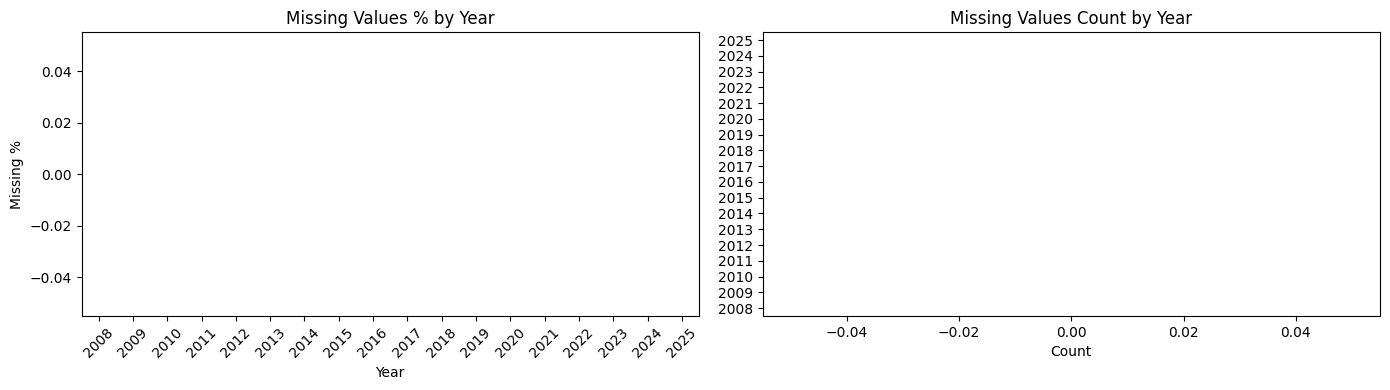

In [2]:
# ===== STEP 1: MISSING VALUE ANALYSIS =====
year_cols = [str(year) for year in range(2008, 2026)]

print("="*60)
print("MISSING VALUE ANALYSIS BEFORE IMPUTATION")
print("="*60)

# Calculate missing percentages
missing_analysis = pd.DataFrame({
    'Column': year_cols,
    'Missing_Count': [df[col].isnull().sum() for col in year_cols],
    'Missing_Percentage': [df[col].isnull().sum() / len(df) * 100 for col in year_cols]
})

print("\nMissing Value Summary:")
print(missing_analysis)
print(f"\nTotal missing values: {df[year_cols].isnull().sum().sum()}")
print(f"Total data points: {len(df) * len(year_cols)}")

# Visualize missing values
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
missing_analysis.set_index('Column')['Missing_Percentage'].plot(kind='bar', color='coral')
plt.title('Missing Values % by Year')
plt.xlabel('Year')
plt.ylabel('Missing %')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df[year_cols].isnull().sum().plot(kind='barh', color='steelblue')
plt.title('Missing Values Count by Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In [3]:
# ===== STEP 2: MISSING VALUE IMPUTATION =====
print("\n" + "="*60)
print("IMPUTATION STRATEGY")
print("="*60)

# Convert to numeric
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Create a copy for comparison
df_before = df[year_cols].copy()

# STRATEGY: Time-Series Interpolation + Carry Forward/Backward Fill
# This is professional approach for temporal data

# Step 1: Linear Interpolation (preserves trends between known values)
print("\n✓ Applying Linear Interpolation (trend-preserving)...")
df[year_cols] = df[year_cols].interpolate(
    method='linear',      # Linear method for smooth transitions
    axis=1,               # Interpolate across years
    limit_direction='both' # Fill from both directions
)

# Step 2: Polynomial Interpolation (for smoother curves if needed)
remaining_na = df[year_cols].isnull().sum().sum()
if remaining_na > 0:
    print(f"\n✓ Applying Polynomial Interpolation (remaining {remaining_na} values)...")
    df[year_cols] = df[year_cols].interpolate(
        method='polynomial',
        order=2,
        axis=1,
        limit_direction='both'
    )

# Step 3: Forward Fill (for leading edges)
remaining_na = df[year_cols].isnull().sum().sum()
if remaining_na > 0:
    print(f"\n✓ Applying Forward Fill (remaining {remaining_na} values)...")
    df[year_cols] = df[year_cols].ffill(axis=1)

# Step 4: Backward Fill (for trailing edges)
remaining_na = df[year_cols].isnull().sum().sum()
if remaining_na > 0:
    print(f"\n✓ Applying Backward Fill (remaining {remaining_na} values)...")
    df[year_cols] = df[year_cols].bfill(axis=1)

# Final check
final_missing = df[year_cols].isnull().sum().sum()
print(f"\n✓ Final missing values: {final_missing}")

if final_missing == 0:
    print("✅ ALL MISSING VALUES SUCCESSFULLY IMPUTED!")
else:
    print(f"⚠️  {final_missing} values could not be imputed")


IMPUTATION STRATEGY

✓ Applying Linear Interpolation (trend-preserving)...

✓ Final missing values: 0
✅ ALL MISSING VALUES SUCCESSFULLY IMPUTED!


In [4]:
df.head(10)

,frq,unit,ag,sx,go,2008,2009,2010,2011,2012,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,A,NR,TOTAL,F,AD,39622.0,40303.0,40296.0,38252.0,38252.0,...,37398.0,3.739467e+04,3.739133e+04,37388.0,37388.0,3.738800e+04,3.738800e+04,37388.0,37388.0,37388.0
1,A,NR,TOTAL,F,AL,1480358.0,1468935.0,1459025.0,1451691.0,1444234.0,...,1417141.0,1.423050e+06,1.431715e+06,1432833.0,1425342.0,1.419759e+06,1.406532e+06,1394864.0,1394864.0,1394864.0
2,A,NR,TOTAL,F,AM,1667529.0,1669711.0,1673656.0,1679066.0,1684000.0,...,1569535.0,1.567380e+06,1.564533e+06,1563538.0,1562689.0,1.566436e+06,1.570182e+06,1573928.5,1577675.0,1577675.0
3,A,NR,TOTAL,F,AT,4265500.0,4278068.0,4285442.0,4296293.0,4309977.0,...,4427918.0,4.460424e+06,4.483749e+06,4501742.0,4522292.0,4.535712e+06,4.553444e+06,4619957.0,4643918.0,4643918.0
4,A,NR,TOTAL,F,AZ,4371800.0,4538600.0,4542083.0,4594023.0,4651601.0,...,4870002.0,4.918771e+06,4.960058e+06,4999053.0,5039100.0,5.055239e+06,5.071377e+06,5087516.0,5113564.0,5113564.0
5,A,NR,TOTAL,F,A,1960361.0,1965986.0,1966011.0,1965701.0,1963655.0,...,1963655.0,1.963655e+06,1.963655e+06,1963655.0,1963655.0,1.963655e+06,1.963655e+06,1963655.0,1963655.0,1963655.0
6,A,NR,TOTAL,F,NaN,5442557.0,5484429.0,5527684.0,5598920.0,5635601.0,...,5741853.0,5.762455e+06,5.784371e+06,5810693.0,5841215.0,5.854293e+06,5.883978e+06,5946649.0,5981093.0,6012626.0
7,A,NR,TOTAL,F,G,3857635.0,3831264.0,3807808.0,3780505.0,3760457.0,...,3578998.0,3.537549e+06,3.494184e+06,3450251.0,3405861.0,3.389807e+06,3.364303e+06,3348207.0,3347783.0,3342220.0
8,A,NR,TOTAL,F,Y,5168358.0,5160289.0,5063266.0,5073034.0,5066857.0,...,5077522.0,5.078185e+06,5.070289e+06,5059429.0,5059429.0,5.059429e+06,5.059429e+06,5059429.0,5059429.0,5059429.0
9,A,NR,TOTAL,F,CH,3866480.0,3915181.0,3955240.0,3992708.0,4032409.0,...,4205655.0,4.246113e+06,4.277696e+06,4307406.0,4337170.0,4.367701e+06,4.400588e+06,4435432.0,4510726.0,4550640.0


In [5]:
# ===== STEP 3: VERIFICATION & QUALITY CHECK =====
print("\n" + "="*60)
print("DATA QUALITY VERIFICATION")
print("="*60)

print("\nImputed Data Sample (first 10 rows):")
print(df.head(10))

print("\nData Statistics After Imputation:")
print(df[year_cols].describe())

# Check for any remaining NaN
print(f"\nFinal Check - Remaining NaN values: {df[year_cols].isnull().sum().sum()}")
print(f"Data Completeness: {((len(df)*len(year_cols) - df[year_cols].isnull().sum().sum()) / (len(df)*len(year_cols)) * 100):.2f}%")


DATA QUALITY VERIFICATION

Imputed Data Sample (first 10 rows):
  frq unit     ag sx   go       2008       2009       2010       2011  \
0   A   NR  TOTAL  F   AD    39622.0    40303.0    40296.0    38252.0   
1   A   NR  TOTAL  F   AL  1480358.0  1468935.0  1459025.0  1451691.0   
2   A   NR  TOTAL  F   AM  1667529.0  1669711.0  1673656.0  1679066.0   
3   A   NR  TOTAL  F   AT  4265500.0  4278068.0  4285442.0  4296293.0   
4   A   NR  TOTAL  F   AZ  4371800.0  4538600.0  4542083.0  4594023.0   
5   A   NR  TOTAL  F    A  1960361.0  1965986.0  1966011.0  1965701.0   
6   A   NR  TOTAL  F  NaN  5442557.0  5484429.0  5527684.0  5598920.0   
7   A   NR  TOTAL  F    G  3857635.0  3831264.0  3807808.0  3780505.0   
8   A   NR  TOTAL  F    Y  5168358.0  5160289.0  5063266.0  5073034.0   
9   A   NR  TOTAL  F   CH  3866480.0  3915181.0  3955240.0  3992708.0   

        2012  ...       2016          2017          2018       2019  \
0    38252.0  ...    37398.0  3.739467e+04  3.739133e+04    


VISUALIZATION: IMPUTATION IMPACT


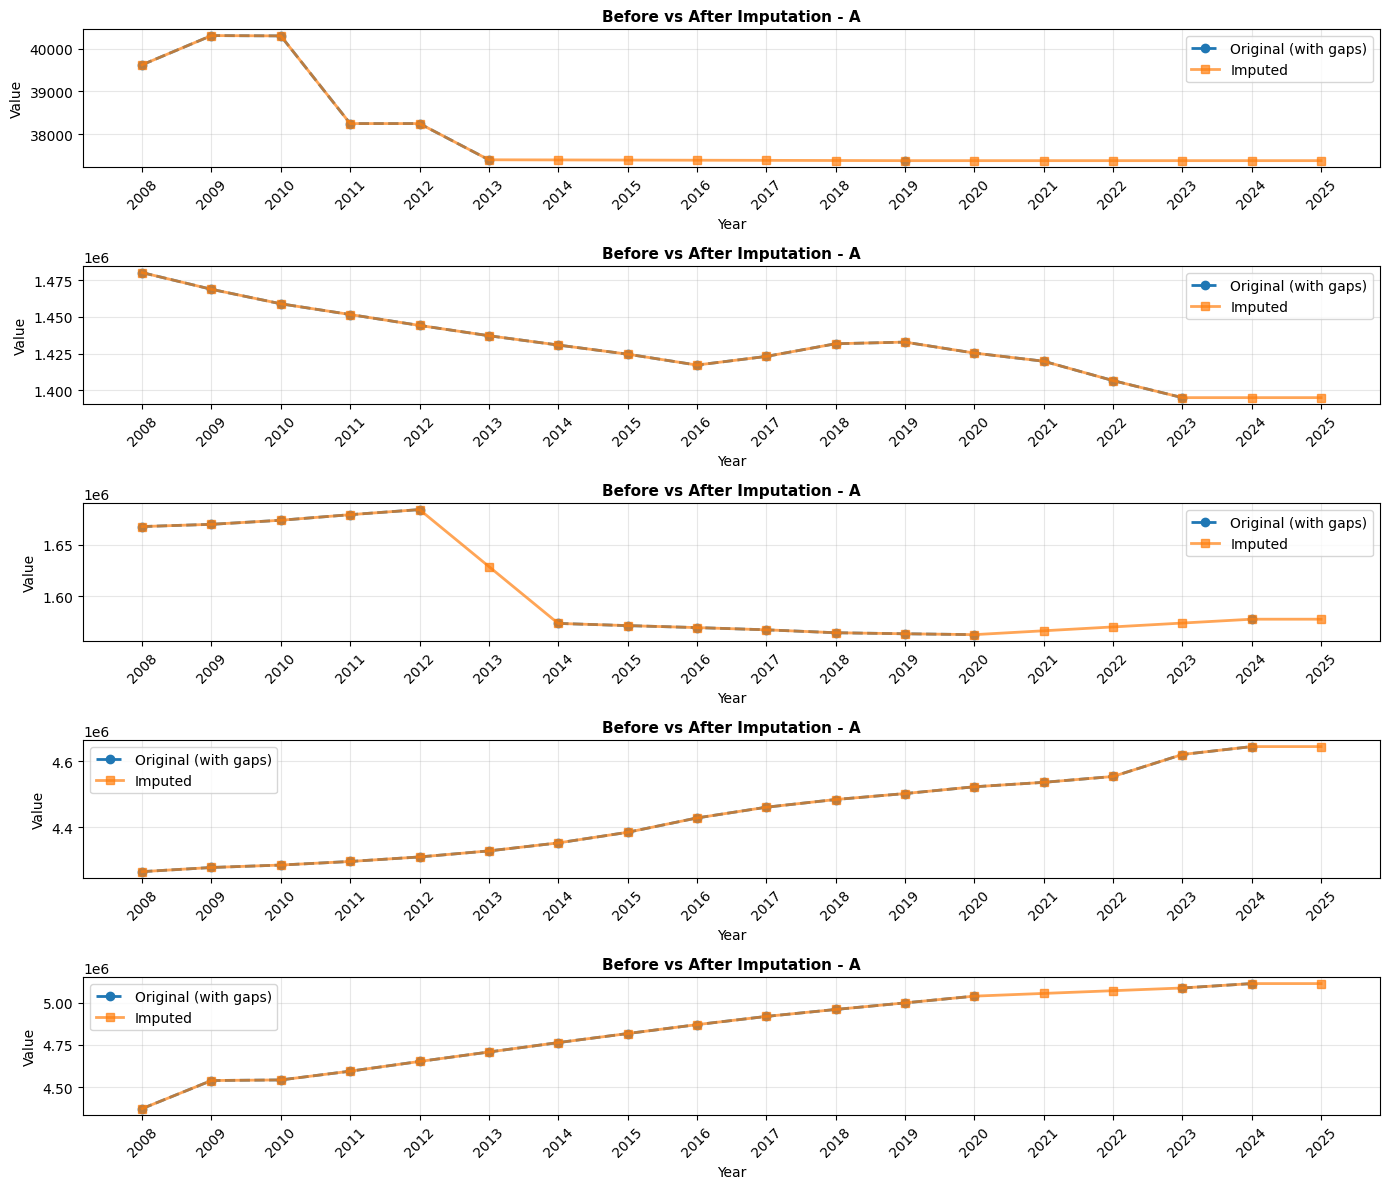

✅ Visualization complete - Review the trends to ensure quality imputation


In [6]:
# ===== STEP 4: VISUALIZATION - BEFORE vs AFTER =====
print("\n" + "="*60)
print("VISUALIZATION: IMPUTATION IMPACT")
print("="*60)

# Select a few sample countries to visualize
sample_countries = df.index[:5]
fig, axes = plt.subplots(5, 1, figsize=(14, 12))

for idx, country_idx in enumerate(sample_countries):
    country_name = df.iloc[country_idx, 0] if df.shape[1] > len(year_cols) else f"Row {country_idx}"
    
    axes[idx].plot(year_cols, df_before.iloc[country_idx], 'o--', label='Original (with gaps)', linewidth=2, markersize=6)
    axes[idx].plot(year_cols, df[year_cols].iloc[country_idx], 's-', label='Imputed', linewidth=2, markersize=6, alpha=0.7)
    axes[idx].set_title(f'Before vs After Imputation - {country_name}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Value')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Visualization complete - Review the trends to ensure quality imputation")

In [7]:
# ===== STEP 5: SAVE CLEANED DATA =====
print("\n" + "="*60)
print("SAVING CLEANED DATA")
print("="*60)

# Save cleaned dataset
output_path = r"C:\Users\abidh\OneDrive\Desktop\datasets\Ratio_young_people_CLEANED.csv"
df_cleav=df.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")
print(f"\nFinal Dataset Shape: {df.shape}")
print(f"Data Type: {df.dtypes}")

print("\n" + "="*60)
print("IMPUTATION COMPLETE - READY FOR ANALYSIS")
print("="*60)


SAVING CLEANED DATA
✅ Cleaned dataset saved to: C:\Users\abidh\OneDrive\Desktop\datasets\Ratio_young_people_CLEANED.csv

Final Dataset Shape: (1200, 23)
Data Type: frq      object
unit     object
ag       object
sx       object
go       object
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
2024    float64
2025    float64
dtype: object

IMPUTATION COMPLETE - READY FOR ANALYSIS
